In [1]:
!unzip -o sample_mflix.zip

Archive:  sample_mflix.zip
  inflating: __MACOSX/._sample_mflix  
  inflating: sample_mflix/sessions.json  
  inflating: __MACOSX/sample_mflix/._sessions.json  
  inflating: sample_mflix/movies.json  
  inflating: __MACOSX/sample_mflix/._movies.json  
  inflating: sample_mflix/comments.json  
  inflating: __MACOSX/sample_mflix/._comments.json  
  inflating: sample_mflix/theaters.json  
  inflating: __MACOSX/sample_mflix/._theaters.json  
  inflating: sample_mflix/users.json  
  inflating: __MACOSX/sample_mflix/._users.json  


In [2]:
import os
from pymongo import MongoClient, ASCENDING, DESCENDING
import bson
import pickle
import pandas as pd
import datetime

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Function to plot theaters on a map
def plot_theaters(theaters, map_type, filename):
    assert map_type in ['wi', 'madison']
    assert filename in ['q32', 'q33', 'q34']
    
    # Convert theater coordinates to a GeoDataFrame
    gdf = gpd.GeoDataFrame(theaters, geometry=gpd.points_from_xy(
        [theater['location']['geo']['coordinates'][0] for theater in theaters],
        [theater['location']['geo']['coordinates'][1] for theater in theaters]
    ))

    world = gpd.read_file("wi_limits.geojson")
    if map_type == 'madison':
        world = gpd.read_file("madison_limits.geojson")
    gdf = gdf.set_crs(world.crs)
    
    # Plot
    ax = world.plot(figsize=(10, 6), color='lightgray', edgecolor='black')
    gdf.plot(ax=ax, marker='o', color='red', markersize=5)
    plt.title("Theater Locations")

    plt.grid(True)
    plt.savefig(f'{filename}.png')
    plt.show()

In [4]:
client = MongoClient('mongodb://localhost:27017/')

In [5]:
db = client.sample_mflix

In [6]:
json_dir = 'sample_mflix'
json_files = [f for f in os.listdir(json_dir) if f.endswith(".json")]
collections = [f.replace(".json", "") for f in json_files]
collections

['comments', 'theaters', 'sessions', 'movies', 'users']

In [6]:
for idx, json_file in enumerate(json_files):
    with open(os.path.join(json_dir, json_file), 'r') as f:
        for line in f:
            data = bson.json_util.loads(line.strip())
            db[collections[idx]].insert_one(data)
        
        print(f"Loaded {json_file} into the '{collections[idx]}' collection.")

DuplicateKeyError: E11000 duplicate key error collection: sample_mflix.comments index: _id_ dup key: { _id: ObjectId('5a9427648b0beebeb69579cc') }, full error: {'index': 0, 'code': 11000, 'errmsg': "E11000 duplicate key error collection: sample_mflix.comments index: _id_ dup key: { _id: ObjectId('5a9427648b0beebeb69579cc') }", 'keyPattern': {'_id': 1}, 'keyValue': {'_id': ObjectId('5a9427648b0beebeb69579cc')}}

In [7]:
db.list_collection_names()

['sessions', 'comments', 'movies', 'theaters', 'users']

In [ ]:
#### Q1: Find the first movie in the movies collection.

In [8]:
#q1

q1 = list(db.movies.find({}).limit(1))
with open('answers/q1.pkl', 'wb') as f:
   pickle.dump(q1[0], f)

In [ ]:
#### Q2: Find all movies directed by "Christopher Nolan".

In [9]:
#q2

q2 = list(db.movies.find({"directors" : "Christopher Nolan"}))
with open('answers/q2.pkl', 'wb') as f:
   pickle.dump(q2, f)

In [ ]:
#### Q3: Find the first 5 users in the users collection.

In [10]:
#q3

q3 = list(db.users.find({}).limit(5))
with open('answers/q3.pkl', 'wb') as f:
   pickle.dump(q3, f)

In [ ]:
#### Q4: Find the first movie with an IMDb rating greater than 9.

In [11]:
#q4

q4 = list(db.movies.find({"imdb.rating": {"$gt" : 9}}))
with open('answers/q4.pkl', 'wb') as f:
   pickle.dump(q4[0], f)

In [ ]:
#### Q5: Count the number of movies in the movies collection.

In [12]:
#q5

q5 = db.movies.count_documents({})
with open('answers/q5.pkl', 'wb') as f:
   pickle.dump(q5, f)

In [ ]:
#### Q6: Count the number of movies released after the year 2000.

In [13]:
#q6

q6 = db.movies.count_documents({"year": {"$gt" : 2000}})
with open('answers/q6.pkl', 'wb') as f:
   pickle.dump(q6, f)

In [ ]:
#### Q7: Count the number of movies in the "Comedy" genre.

In [14]:
#q7

q7 = db.movies.count_documents({"genres": {"$in" : ["Comedy"]}})
with open('answers/q7.pkl', 'wb') as f:
   pickle.dump(q7, f)

In [ ]:
#### Q8: Count the number of comments made by the user "Taylor Hill".

In [15]:
#q8

q8 = db.comments.count_documents({"name": "Taylor Hill"})
with open('answers/q8.pkl', 'wb') as f:
   pickle.dump(q8, f)

In [ ]:
#### Q9: Count the number of movies with a runtime greater than 120 minutes.

In [16]:
#q9

q9 = db.movies.count_documents({"runtime": {"$gt" : 120}})
with open('answers/q9.pkl', 'wb') as f:
   pickle.dump(q9, f)

In [ ]:
#### Q10: Find all movies released in year 2015.

In [17]:
#q10

q10 = list(db.movies.find({"year": 2015}, {"title": 1, "_id": 0}).sort("title", ASCENDING))
with open('answers/q10.pkl', 'wb') as f:
   pickle.dump(q10, f)

In [ ]:
#### Q11: Find the top 5 most recent comments.

In [18]:
#q11

q11 = list(db.comments.find({}).sort("date", DESCENDING).limit(5))
with open('answers/q11.pkl', 'wb') as f:
   pickle.dump(q11, f)

In [ ]:
#### Q12: Count the number of movies with both "Action" and "Adventure" as genres.

In [19]:
#q12

q12 = db.movies.count_documents({
    "$and" : [
        {"genres" : {"$in" : ["Adventure"]}},
        {"genres" : {"$in" : ["Action"]}}
    ]})
with open('answers/q12.pkl', 'wb') as f:
   pickle.dump(q12, f)

In [ ]:
#### Q13: Find all movies with an IMDb rating between 9 and 10.

In [20]:
#q13

q13 = list(db.movies.find({
    "imdb.rating" : {"$gte" : 9, "$lte" : 10}
    },
    {"title": 1, "imdb.rating": 1, "genres": 1, "year": 1, "_id": 0}))
with open('answers/q13.pkl', 'wb') as f:
   pickle.dump(q13, f)

In [ ]:
#### Q14: Count the number of movies with exactly 3 directors.

In [21]:
#q14

q14 = db.movies.count_documents({
    "directors" : {"$size" : 3}
    })
with open('answers/q14.pkl', 'wb') as f:
   pickle.dump(q14, f)

In [ ]:
#### Q15: Count the number of movies with at least 3 directors.

In [22]:
#q15

q15 = db.movies.count_documents({
    "$expr": {
        "$gte": [{"$size": {"$ifNull": ["$directors", []]}}, 3]
    }
})
with open('answers/q15.pkl', 'wb') as f:
   pickle.dump(q15, f)

In [ ]:
#### Q16: Find the total number of comments made on movies released in 2010.

In [23]:
#q16

q16 = db.comments.count_documents({
    "movie_id": {
        "$in": [
            movie["_id"] for movie in db.movies.find({"year": 2010})
        ]
    }
})

with open('answers/q16.pkl', 'wb') as f:
   pickle.dump(q16, f)

In [ ]:
#### Q17: Find all unique users who have commented on "Action" movies.

In [24]:
#q17

q17 = db.comments.distinct("name",{
    "movie_id": {
        "$in": [
            movie["_id"] for movie in db.movies.find({
                "genres": {
                    "$in": ["Action"]
                } 
            })
        ]
    }
})

with open('answers/q17.pkl', 'wb') as f:
   pickle.dump(q17, f)

In [ ]:
#### Q18: Find all comments made on or after August 13th, 2018.

In [25]:
#q18

q18 = list(db.comments.find({
    "date" : {
        "$gte" : datetime.datetime(2018, 8, 13)
    }
}))

with open('answers/q18.pkl', 'wb') as f:
   pickle.dump(q18, f)

In [ ]:
#### Q19: Count the total number of comments made on movies directed by "Steven Spielberg".

In [26]:
#q19

q19 = db.comments.count_documents({
    "movie_id": {
        "$in": [
            movie["_id"] for movie in db.movies.find({
                "directors" : {
                    "$in" : ["Steven Spielberg"]
                }
            })
        ]
    }
})

with open('answers/q19.pkl', 'wb') as f:
   pickle.dump(q19, f)

In [ ]:
#### Q20: Find the 10 most recent movies with an IMDb rating greater than 9.0.

In [27]:
#q20

q20 = list(db.movies.find({
    "imdb.rating" : {
        "$gt" : 9.0
    }
}, {"_id": 0, "title": 1, "imdb.rating": 1, "released": 1}).sort("released", DESCENDING).limit(10))

with open('answers/q20.pkl', 'wb') as f:
   pickle.dump(q20, f)

In [ ]:
#### Q21: Find the total number of movies that have no comments.

In [28]:
#q21

q21 = db.movies.count_documents({
    "_id": {
        "$nin": [
            comment["movie_id"] for comment in db.comments.find({}, {"movie_id": 1, "_id": 0})
        ]
    }
})

with open('answers/q21.pkl', 'wb') as f:
   pickle.dump(q21, f)

In [ ]:
#### Q22: Find the total number of movies where the title starts with "The".

In [29]:
#q22

q22 = db.movies.count_documents({
    "title": {
        "$regex": "^The"
    }
})

with open('answers/q22.pkl', 'wb') as f:
   pickle.dump(q22, f)

In [ ]:
#### Q23: Find the average IMDb rating of all "Action" movies.

In [30]:
#q23

pipeline = [
    {
        "$match": {
            "genres": {
                "$in": ["Action"]
            }
        }
    },
    {
        "$group": {
            "_id": None, "average_rating": {
                "$avg": "$imdb.rating"
            }
        }
    },
    {
        "$project": {
            "_id": 0,
            "average_rating": {
                    "$round": ["$average_rating", 2]
            }
        }
    }
]

q23 = list(db.movies.aggregate(pipeline))

with open('answers/q23.pkl', 'wb') as f:
   pickle.dump(q23, f)

In [ ]:
#### Q24: Find the top 5 users who have made the most comments.

In [31]:
#q24

pipeline = [
    {
        "$group": {
            "_id": "$name", 
            "total_comments": {
                "$sum": 1
            }
        }
    },
    {
        "$sort": {
            "total_comments": -1,
            "_id": 1
        }
    },
    {
        "$limit": 5
    }
]

q24 = list(db.comments.aggregate(pipeline))

with open('answers/q24.pkl', 'wb') as f:
   pickle.dump(q24, f)

In [ ]:
#### Q25: Find the 5 most commented movies in the database.

In [32]:
#q25

pipeline = [
    {
        "$group": {
            "_id": "$movie_id", 
            "total_comments": {
                "$sum": 1
            }
        }
    },
    {
      "$lookup": {
          "from": "movies",
          "localField": "_id",
          "foreignField": "_id",
          "as": "movie_info"
      }  
    },
    {
        "$sort": {
            "total_comments": -1,
            "movie_info.title": 1
        }
    },
    {
        "$project": {
            "_id": 1,
            "total_comments": 1
        }
    },
    {
        "$limit": 5
    }
]

q25 = list(db.comments.aggregate(pipeline))

with open('answers/q25.pkl', 'wb') as f:
   pickle.dump(q25, f)

In [ ]:
#### Q26: Find the average runtime of all movies in the "Sci-Fi" genre.

In [33]:
#q26

pipeline = [
    {
        "$match": {
            "genres": {
                "$in": ["Sci-Fi"]
            }
        }
    },
    {
        "$group": {
            "_id": None, "average_runtime": {
                "$avg": "$runtime"
            }
        }
    },
    {
        "$project": {
            "_id": 0,
            "average_runtime": {
                    "$round": ["$average_runtime", 2]
            }
        }
    }
]

q26 = list(db.movies.aggregate(pipeline))

with open('answers/q26.pkl', 'wb') as f:
   pickle.dump(q26, f)

In [ ]:
#### Q27: Find the top 3 directors by the number of movies they directed.

In [34]:
#q27

pipeline = [
    {
        "$unwind": "$directors"
    },
    {
        "$group": {
            "_id": "$directors", 
            "count": {
                "$sum": 1
            }
        }
    },
    {
        "$sort": {
            "count": -1,
            "_id": 1
        }
    },
    {
        "$limit": 3
    }
]

q27 = list(db.movies.aggregate(pipeline))

with open('answers/q27.pkl', 'wb') as f:
   pickle.dump(q27, f)

In [ ]:
#### Q28: Find the top 5 most active users (based on the number of comments).

In [35]:
#q28

pipeline = [
    {
        "$group": {
            "_id": "$email",
            "comment_count": {
                "$sum": 1
            }
        }
    },
    {
        "$sort": {
            "comment_count": -1,
        }
    },
    {
        "$project": {
            "_id": 0,
            "email": "$_id",
            "comment_count": 1   
        }
    },
    {
        "$limit": 5
    }
]

q28 = list(db.comments.aggregate(pipeline))

with open('answers/q28.pkl', 'wb') as f:
   pickle.dump(q28, f)

In [ ]:
#### Q29: Find the average IMDb rating for each genre and list the top 5 genres with the highest average rating.

In [36]:
#q29

pipeline = [
    {
        "$unwind": "$genres"
    },
    {
        "$group": {
            "_id": "$genres", 
            "average_rating": {
                "$avg": "$imdb.rating"
            }
        }
    },
    {
        "$sort": {
            "average_rating": -1
        }
    },
    {
        "$project": {
            "_id": 1,
            "average_rating": {
                    "$round": ["$average_rating", 2]
            }
        }
    },
    {
        "$limit": 5
    }
]

q29 = list(db.movies.aggregate(pipeline))

with open('answers/q29.pkl', 'wb') as f:
   pickle.dump(q29, f)

In [ ]:
#### Q30: Find all users who have commented on both "Action" and "Drama" movies.

In [37]:
#q30

pipeline = [
    {
        "$lookup": {
            "from": "movies",
            "localField": "movie_id",
            "foreignField": "_id",
            "as": "movie"
        }
    },
    {
        "$unwind": "$movie"
    },
    {
        "$unwind": "$movie.genres"
    },
    {
        "$group": {
            "_id": "$name",
            "genres": { 
                "$addToSet": "$movie.genres" 
            }
        }
    },
    {
        "$match": {
            "genres" : {
                "$all": ["Action", "Drama"]
            }
        }
    },
    {
        "$sort": {
            "_id": 1 
        }
    },
    {
        "$project": {
            "_id": 1,
        }
    }
]

q30 = list(db.comments.aggregate(pipeline))

with open('answers/q30.pkl', 'wb') as f:
   pickle.dump(q30, f)

In [ ]:
#### Q31: Find the user who commented on the most distinct movies (i.e., most distinct movie_ids).

In [38]:
#q31

pipeline = [
    {
        "$group": {
            "_id": "$name",
            "unique_movies": {
                "$addToSet": "$movie_id" 
            }
        }
    },
    {
        "$project" : {
            "_id": 1,
            "unique_movies": {
                "$size": "$unique_movies"
            }
        }
    },
    {
        "$sort": {
            "unique_movies": -1
        }
    },
    {
        "$project": {
            "_id": 1,
            "unique_movies": 1   
        }
    },
    {
        "$limit": 1
    }
]

q31 = list(db.comments.aggregate(pipeline))

with open('answers/q31.pkl', 'wb') as f:
   pickle.dump(q31, f)

In [ ]:
#### Q32: Find all theaters located in Wisconsin (WI) and plot them on a map of WI.

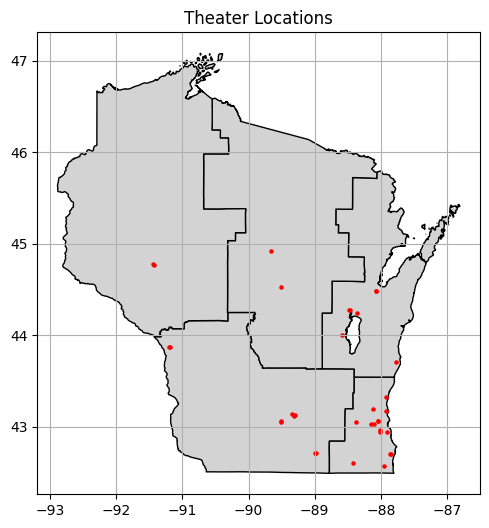

In [39]:
#q32

q32 = list(db.theaters.find({"location.address.state" : "WI"}))
plot_theaters(q32, "wi", "q32")

In [ ]:
#### Q33: Find the top 2 theaters nearest to the Peninsula State Park and plot them on a map of WI.

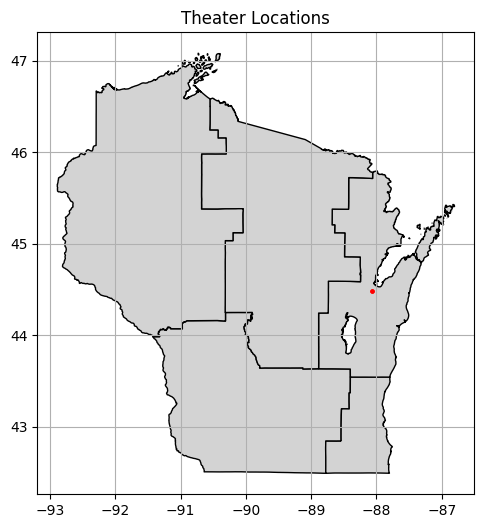

In [40]:
#q33

db.theaters.create_index([("location.geo", "2dsphere")])
peninsula_coordinates = [-87.22109, 45.15602]

q33 = list(db.theaters.find(
   {
     "location.geo":
       { "$near" :
          {
            "$geometry": { "type": "Point",  "coordinates": peninsula_coordinates },
            "$maxDistance": 1000 * 1000  
          }
       }
   }
).limit(2))
plot_theaters(q33, "wi", "q33")

In [ ]:
#### Q34: Find theaters within 10 miles of the UW-Madison and plot them on a map of Madison.

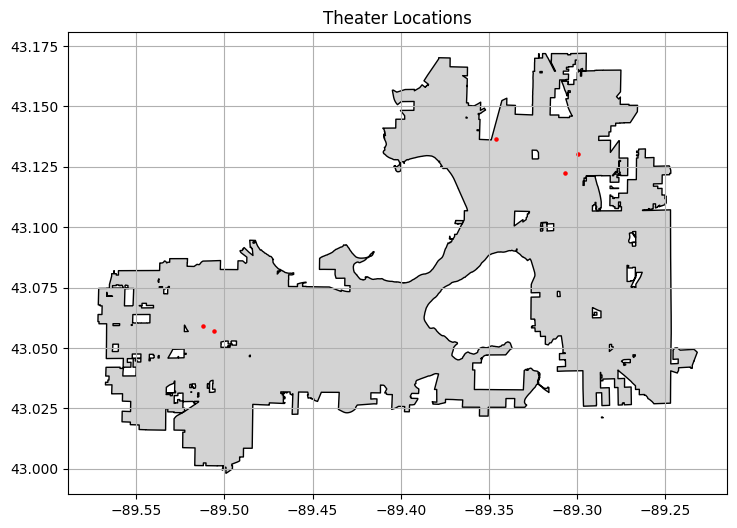

In [41]:
#q34

db.theaters.create_index([("location.geo", "2dsphere")])
uw_mad_coordinates = [-89.40816, 43.07540]

q34 = list(db.theaters.find(
   {
     "location.geo":
       { "$near" :
          {
            "$geometry": { "type": "Point",  "coordinates": uw_mad_coordinates },
            "$maxDistance": 16093.4  
          }
       }
   }
))
plot_theaters(q34, "madison", "q34")